In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

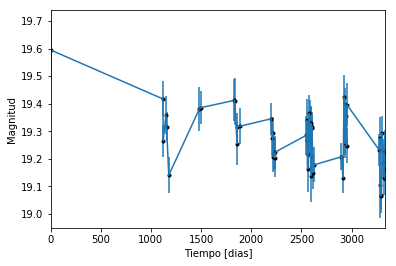

In [2]:
data = np.genfromtxt('LC_Z_99669.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

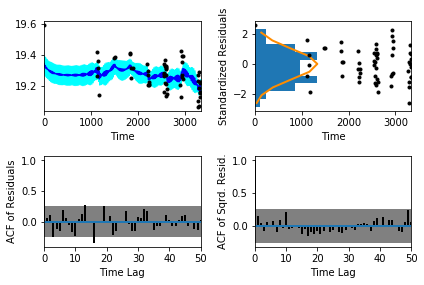

In [5]:
sample.assess_fit()

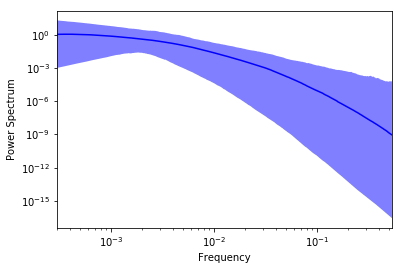

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

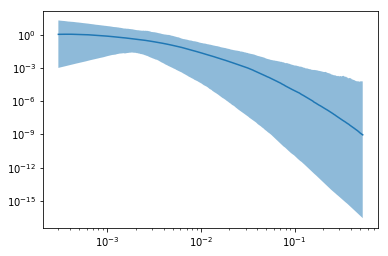

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

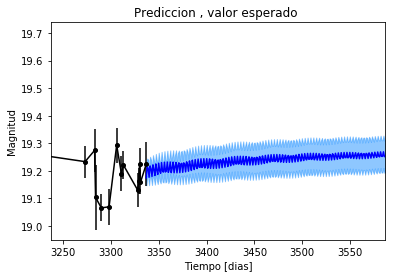

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

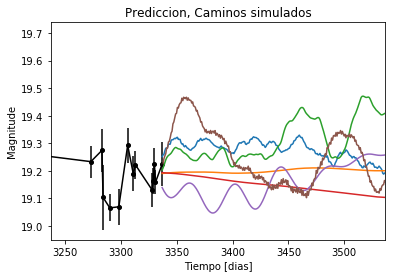

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 6
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


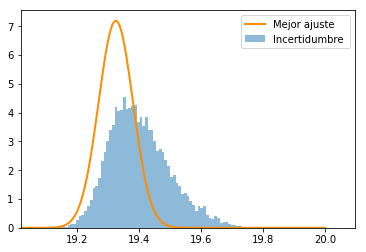

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

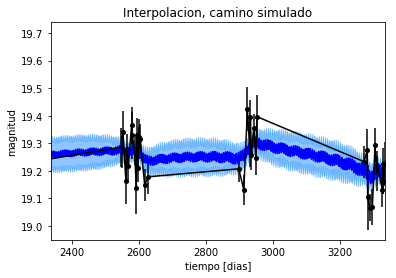

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

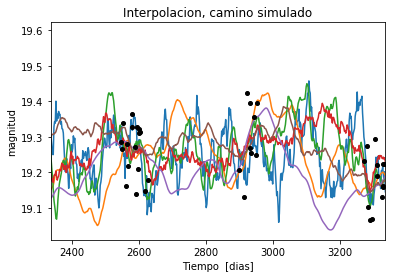

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1588.98481853
Median: 0.0307699083753
Standard deviation: 0.275218697681
68% credibility interval: [ 0.          0.48098544]
95% credibility interval: [ 0.          0.94485052]
99% credibility interval: [ 0.          1.03299037]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1588.98481853
Median: 0.0307699083753
Standard deviation: 0.275218697681
68% credibility interval: [ 0.          0.48098544]
95% credibility interval: [ 0.          0.94485052]
99% credibility interval: [ 0.          1.03299037]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1691.69270159
Median: 0.0
Standard deviation: 0.00255798145516
68% cre

Plotting parameter summary


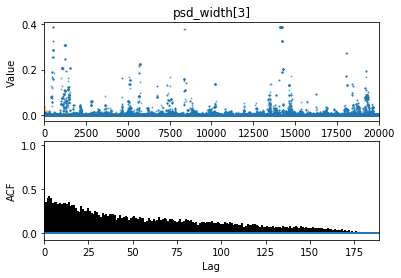

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1297.42394923
Median: 88.2222962185
Standard deviation: 1.54575565005
68% credibility interval: [ 86.46327094  89.31447215]
95% credibility interval: [ 84.09026884  90.05805855]
99% credibility interval: [ 82.19043038  90.44210804]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 357.469778705
Median: 1.17528167919
Standard deviation: 2.44785838074
68% credibility interval: [ 0.12916645  4.8045584 ]
95% credibility interval: [ 0.01860071  8.38899102]
99% credibility interval: [  0.0112807   11.10861125]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 820.695452622
Median: 1.2540809416
Standard deviation: 10.5827753073
68% credibility interval: [  0.05062988  14.06809038]
95% credibility interval: [  2.73798994e-

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3454.89813244
Median: 2.89658054856e-16
Standard deviation: 3.94249799005e+72
68% credibility interval: [  1.48887737e-52   4.84432351e+22]
95% credibility interval: [  5.11501999e-85   1.08890584e+53]
99% credibility interval: [  7.27040253e-102   1.11681155e+068]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3301.01905669
Median: 19.284747784
Standard deviation: 0.0462376348623
68% credibility interval: [ 19.25593984  19.32368741]
95% credibility interval: [ 19.21790548  19.40700555]
99% credibility interval: [ 19.17359304  19.47797989]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1588.98481853
Median: 0.0307699083753
Standard deviation: 0.275218697681
68% credibility interval: [ 0.          0.48098544]
95% credibility interval: [ 0.          0.94485052]
99% credibility interval: [ 0.          1.03299037]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1588.98481853
Median: 0.0307699083753
Standard deviation: 0.275218697681
68% credibility interval: [ 0.          0.48098544]
95% credibility interval: [ 0.          0.94485052]
99% credibility interval: [ 0.          1.03299037]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1691.69270159
Median: 0.0
Standard deviation: 0.00255798145516
68% cre

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1297.42394923
Median: 88.2222962185
Standard deviation: 1.54575565005
68% credibility interval: [ 86.46327094  89.31447215]
95% credibility interval: [ 84.09026884  90.05805855]
99% credibility interval: [ 82.19043038  90.44210804]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 602.83304286
Median: 0.0162595224809
Standard deviation: 0.20806260175
68% credibility interval: [ 0.00106254  0.23568222]
95% credibility interval: [  3.66269230e-04   8.13315809e-01]
99% credibility interval: [  3.11805149e-04   9.90728871e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 630.229375601
Median: 0.00436364380938
Standard deviation: 0.0974084116562
68% credibility interval: [ 0.0006408   0.05123325]
95% credibility interval: [  3.35986414e-04   3.36270817e-01]
99% credibility interval: [  3.06626267e-04   6.71535506e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 317.48009921
Median: 0.0501297680767
St

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1665.93570227
Median: 0.00718411617342
Standard deviation: 0.0115017405096
68% credibility interval: [ 0.00359577  0.01589674]
95% credibility interval: [ 0.00163644  0.03838774]
99% credibility interval: [ 0.00096487  0.07363803]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1358.20817136
Median: 1.13552077041
Standard deviation: 0.193564768523
68% credibility interval: [ 0.9585168   1.33944465]
95% credibility interval: [ 0.81710092  1.57896634]
99% credibility interval: [ 0.74696646  1.75978797]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 554.455619574
Median: 0.000222401093688
Standard deviation: 0.208691255163
68% credibility interval: [  3.92404161e-25   3.21940377e-02]
95% credibility interval: [  1.07966537e-54   5.84634177e-01]
99% credibility interval: [  2.32684686e-71   1.28387971e+00]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 602.83304286
Median: (-0.102161592754-2.35393551718j)
Standard deviation: 2.16779342985
68% credibility interval: [-1.48083504-0.159552j   -0.00667614-1.67012158j]
95% credibility interval: [ -5.11021394e+00+0.j          -2.30133744e-03-2.48559113j]
99% credibility interval: [ -6.22493308e+00+0.j          -1.95912953e-03-4.04947095j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 630.229375601
Median: (-0.0274175826689+1.04632618315j)
Standard deviation: 1.83436441183
68% credibility interval: [-0.32190802+1.23297729j -0.00402627+0.j        ]
95% credibility interval: [ -2.11285186e+00+4.1073445j   -2.11106490e-03+0.04437924j]
99% credibility interval: [ -4.21938203e+00+2.62090181j  -1.92658965e-03+0.01639324j]
Poster

Plotting 2d PDF w KDE


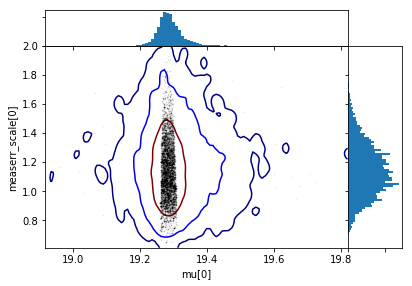

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


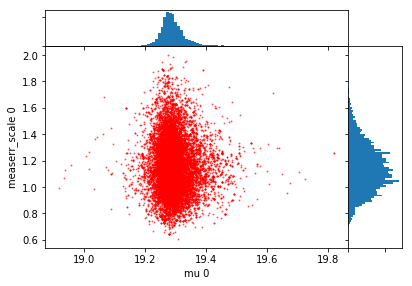

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


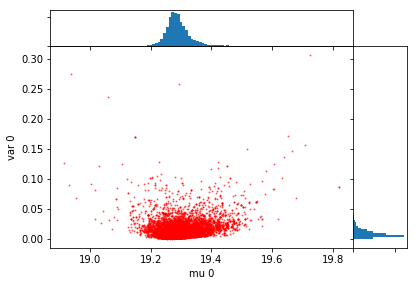

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


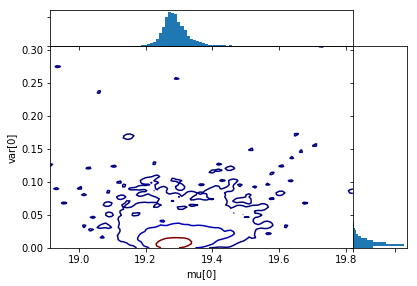

In [42]:
sample.plot_2dkde('mu', 'var', doShow=True)